# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import silhouette_score
warnings.filterwarnings("ignore", category=RuntimeWarning) 
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
from sklearn import datasets
#from sklearn.preprocessing import StandardScaler

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
#X = StandardScaler().fit_transform(X)
y = pd.Series(data["target"])

X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state=42)

kmeans.fit(X)
y_pred=kmeans.predict(X)
silhouette_score(X, y_pred)

C:\Users\akoun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akoun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.5406824747857601

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [4]:
kmeans = KMeans(n_clusters=5, random_state=42)

kmeans.fit(X)
y_pred=kmeans.predict(X)
silhouette_score(X, y_pred)

C:\Users\akoun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akoun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.5489993239795675

In [5]:
X['labels']=y_pred

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [6]:
kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(X)
y_pred=kmeans.predict(X)
silhouette_score(X, y_pred)

C:\Users\akoun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akoun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.5711252292995317

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

In [7]:
from yellowbrick.cluster import KElbowVisualizer

C:\Users\akoun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akoun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\akoun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akoun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

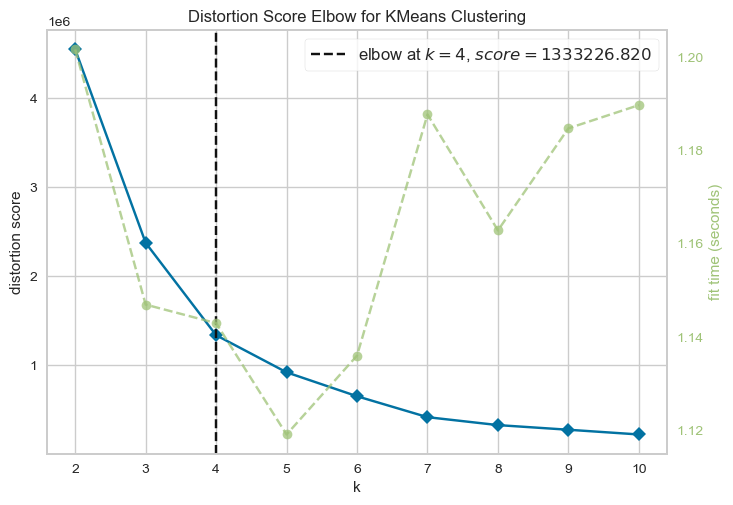

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
model = KMeans()

visualizer = KElbowVisualizer(model, k=(2, 11), metric='distortion')

visualizer.fit(X)

visualizer.show()



## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

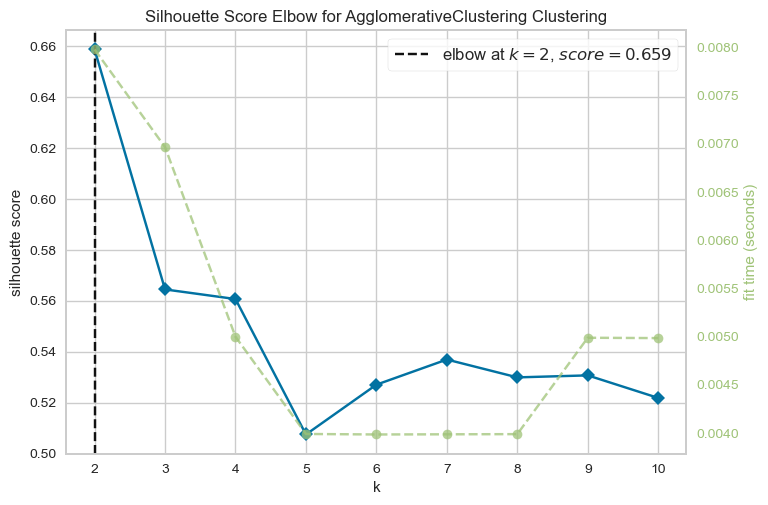

<Axes: title={'center': 'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [9]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering()

visualizer = KElbowVisualizer(model, k=(2, 11), metric='silhouette')

visualizer.fit(X)

visualizer.show()


## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

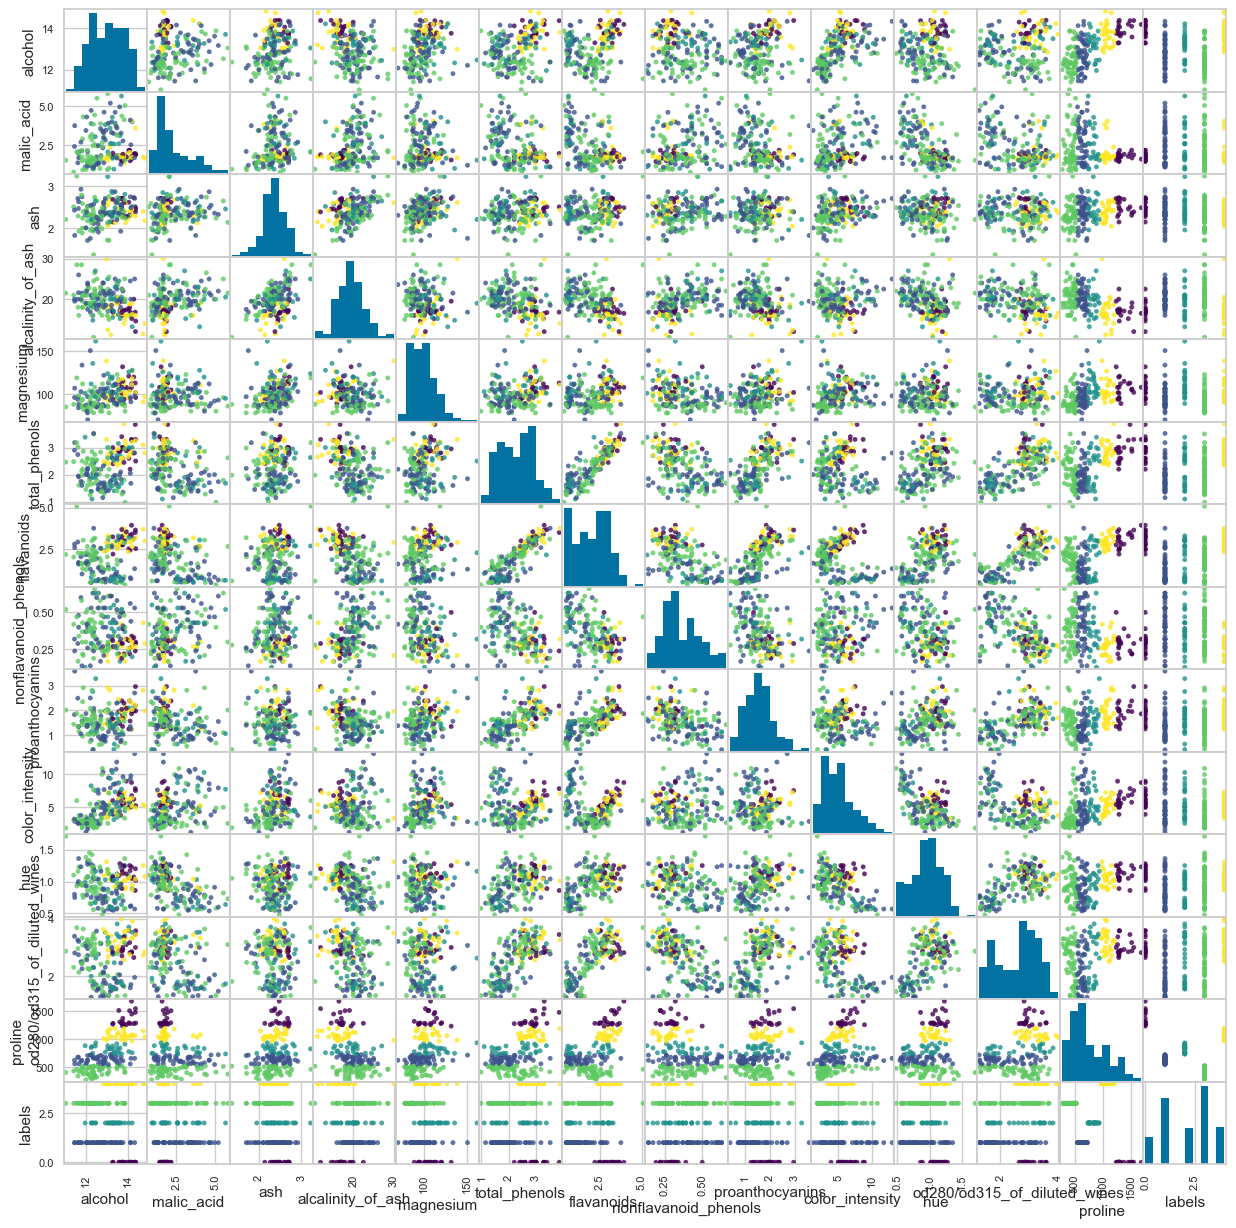

In [10]:
X_clusters = X.copy()
X_clusters['labels'] = X['labels']

cluster_palette = sns.color_palette("viridis", as_cmap=True)

scatter_matrix(X_clusters, alpha=0.8, figsize=(15, 15), diagonal='hist', c=X_clusters['labels'], cmap=cluster_palette)

plt.show()


## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [11]:
pca = PCA().fit(X)

pca_x = pca.transform(X)

pca_x.shape


(178, 14)

C:\Users\akoun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akoun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


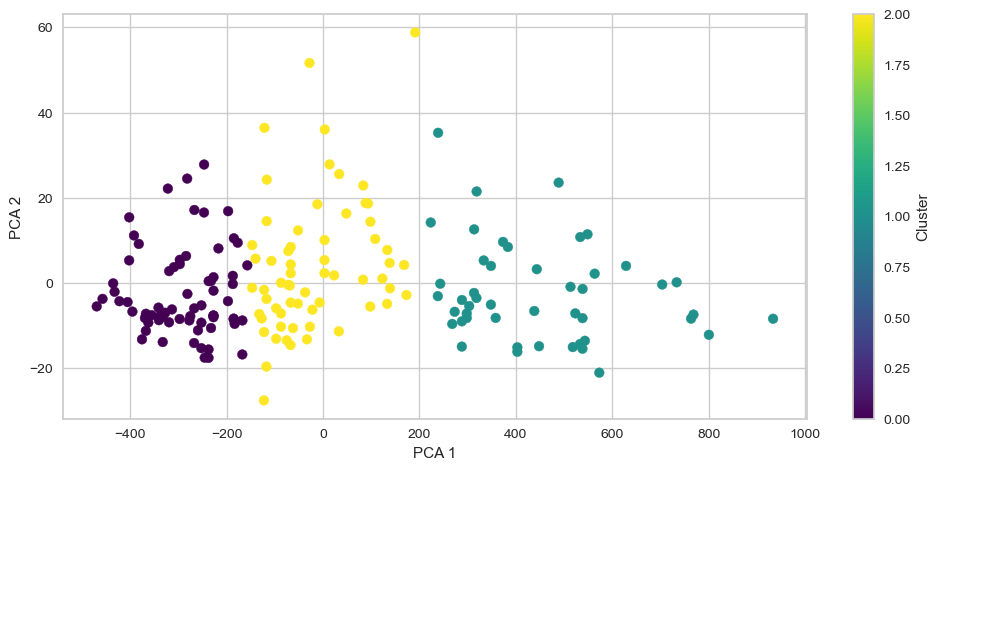

In [15]:
kmeans = KMeans(n_clusters=3)  
cluster_labels = kmeans.fit_predict(X)

pca = PCA().fit(X)
pca_x = pca.transform(X)

fig = plt.figure(figsize=(12, 8))

ax0 = plt.subplot2grid((6, 1), (0, 0), rowspan=4)
scatter = ax0.scatter(pca_x[:, 0], pca_x[:, 1], c=cluster_labels, cmap='viridis')
ax0.set_xlabel('PCA 1')
ax0.set_ylabel('PCA 2')
plt.colorbar(scatter, ax=ax0, label='Cluster')

ax1 = plt.subplot2grid((6, 1), (5, 0))
y = np.ones(X.shape[0])
ax1.plot(pca_x[:, 2], y, '|', ms='20')
ax1.axis('off')

plt.show()


## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

C:\Users\akoun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akoun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


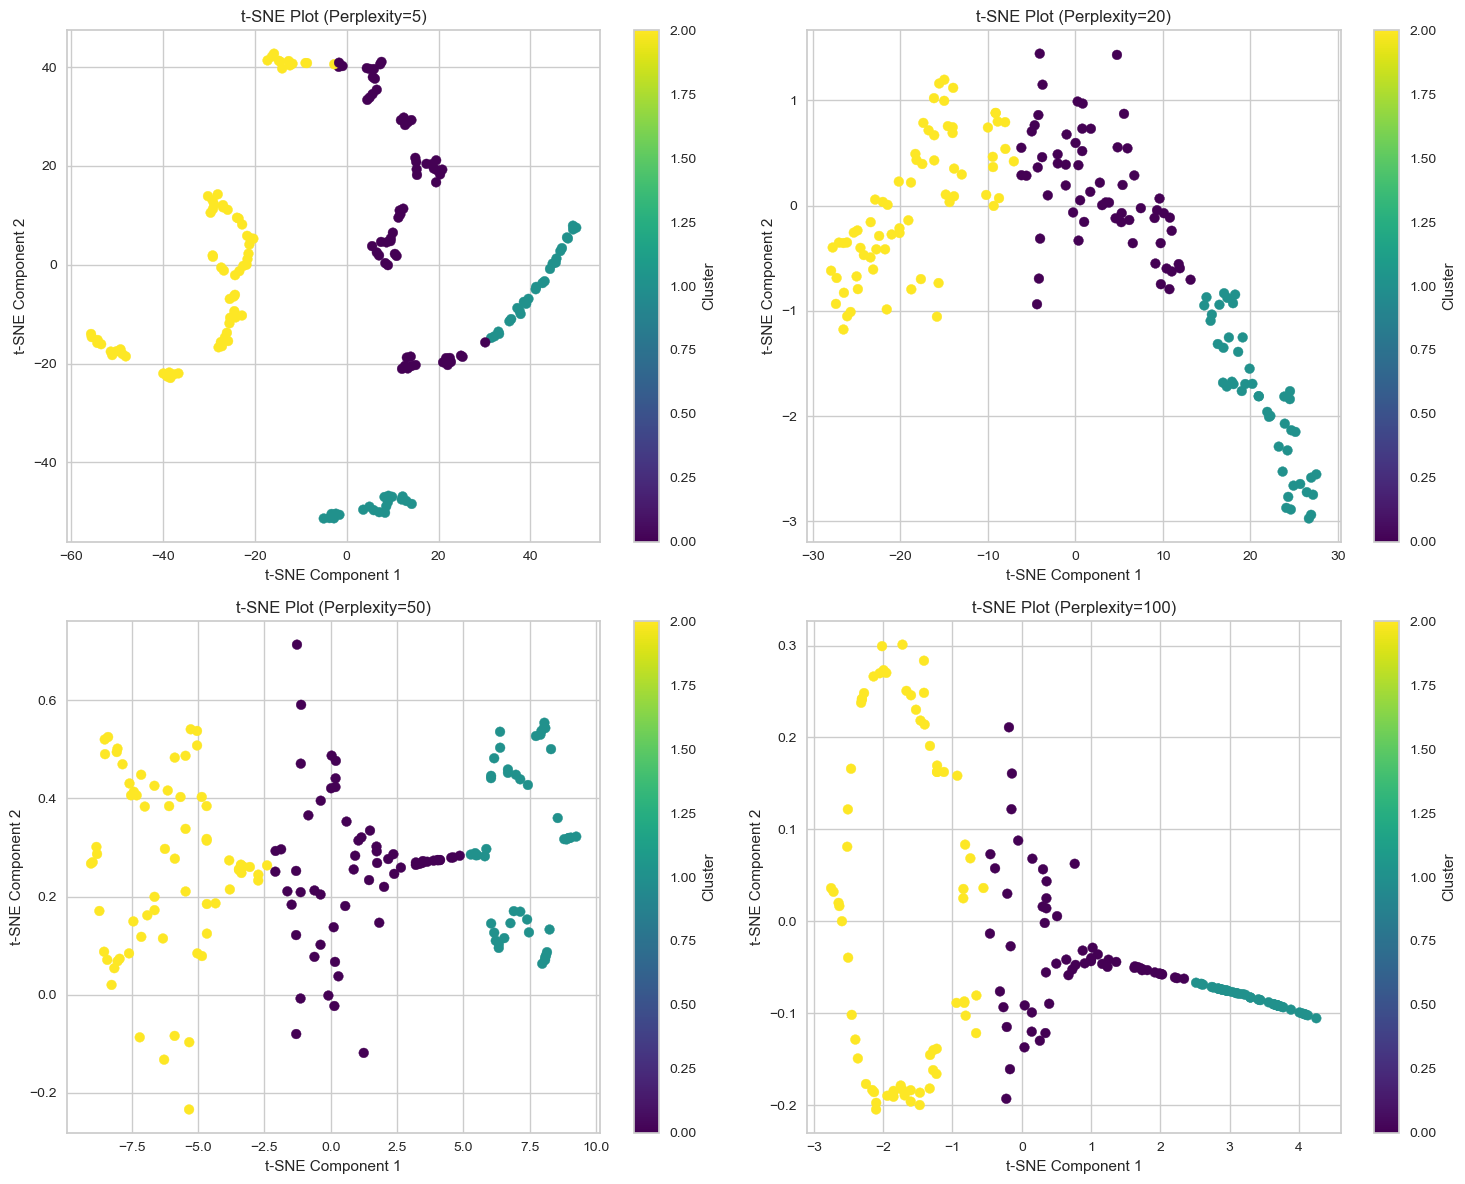

In [17]:
from sklearn.manifold import TSNE

kmeans = KMeans(n_clusters=3)
cluster_labels = kmeans.fit_predict(X)

# Define a list of perplexities for t-SNE
perplexities = [5, 20, 50, 100]

# Create subplots for each perplexity
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

for i, perplexity in enumerate(perplexities):
    # Apply t-SNE transform
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    tsne_result = tsne.fit_transform(X)

    # Plot t-SNE results with cluster colors
    ax = axes.flatten()[i]
    scatter = ax.scatter(tsne_result[:, 0], tsne_result[:, 1], c=cluster_labels, cmap='viridis')
    ax.set_title(f't-SNE Plot (Perplexity={perplexity})')
    ax.set_xlabel('t-SNE Component 1')
    ax.set_ylabel('t-SNE Component 2')
    plt.colorbar(scatter, ax=ax, label='Cluster')

plt.tight_layout()
plt.show()